Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [3]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path("D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [5]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [6]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [8]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

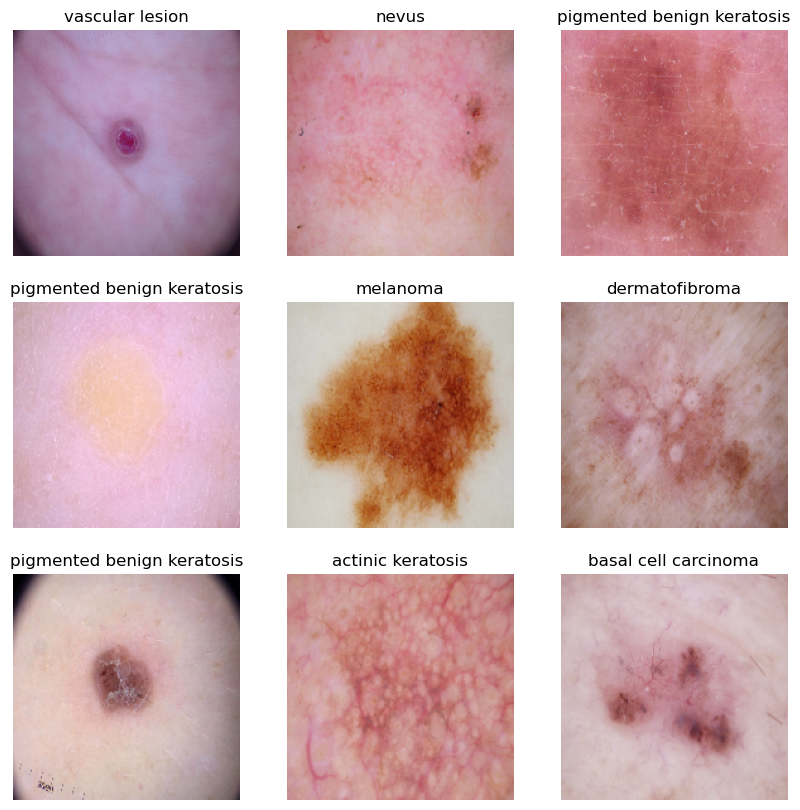

In [9]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [11]:
### Your code goes here

from tensorflow.keras import layers,models
input_shape = (img_height, img_width, 3)
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Rescaling(1./255),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])


### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [12]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [13]:
# View the summary of all layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [14]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 37s 527ms/step - accuracy: 0.2277 - loss: 2.1476 - val_accuracy: 0.3714 - val_loss: 1.7459
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 421ms/step - accuracy: 0.3679 - loss: 1.7071 - val_accuracy: 0.4899 - val_loss: 1.4477
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 402ms/step - accuracy: 0.4340 - loss: 1.5015 - val_accuracy: 0.4653 - val_loss: 1.4985
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 411ms/step - accuracy: 0.4885 - loss: 1.4151 - val_accuracy: 0.5257 - val_loss: 1.3981
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 402ms/step - accuracy: 0.5398 - loss: 1.2967 - val_accuracy: 0.4855 - val_loss: 1.5091
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 405ms/step - accuracy: 0.5886 - loss: 1.2020 - val_accuracy: 0.5168 - val_loss: 1.3630
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 390ms/step - accuracy: 0.6044 - loss: 1.1314 - val_accuracy: 0.5369 - val_loss: 1.3485
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 397ms/step - accuracy: 0.6452 - loss: 1.0271 - val_accu

### Visualizing training results

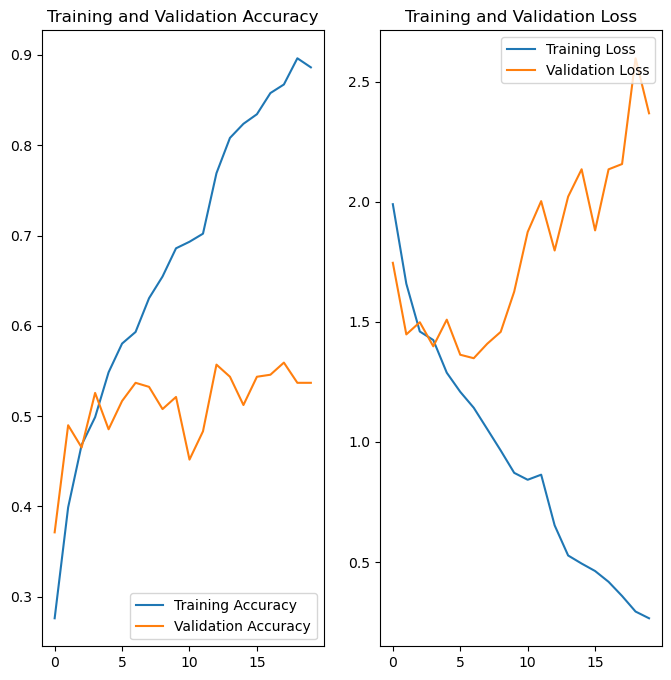

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

In [ ]:
# Conclusion:The model shows clear signs of overfitting because:
# Training accuracy is very high, indicating that the model has learned the training data too well, including potentially memorizing it.
# Validation accuracy, although improving initially, remains lower than training accuracy and fluctuates without significant improvement.
# Validation loss decreases initially but then increases significantly, indicating that the model's performance on unseen data is deteriorating.

In [16]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2)
])

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


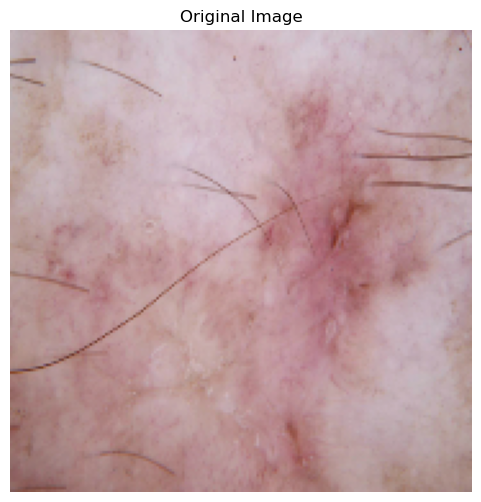

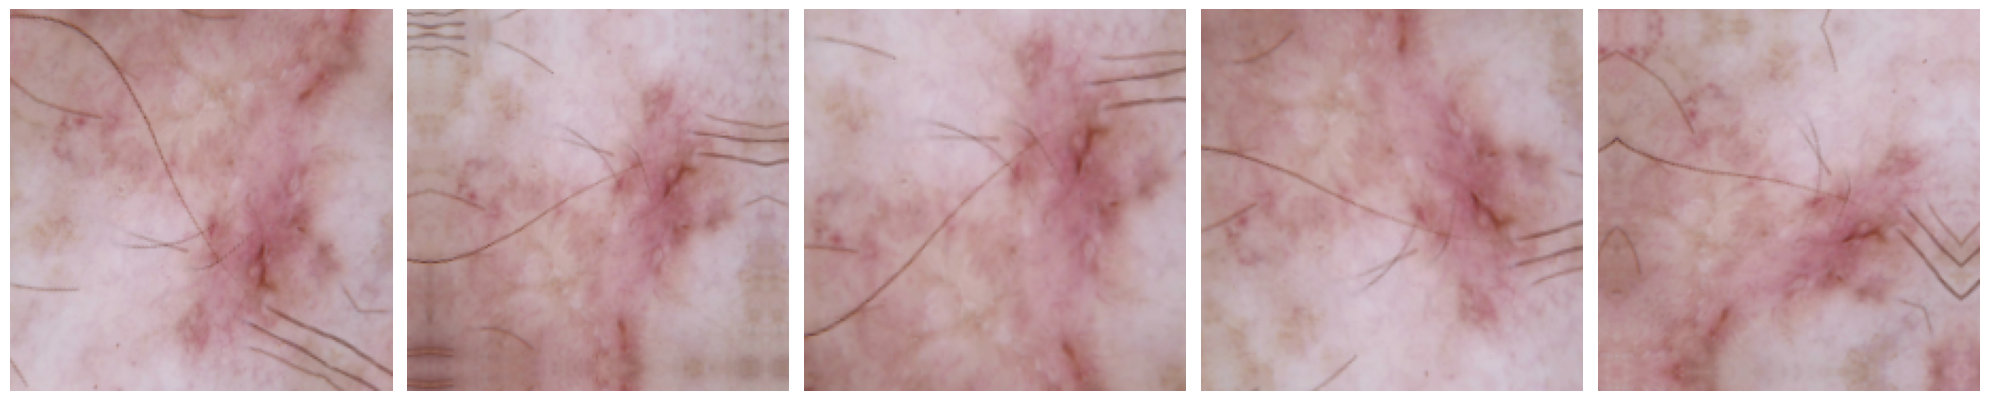

In [17]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here

sample_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=1
)

# Get one batch (one image)
for images, labels in sample_dataset.take(1):
    sample_image = images[0].numpy().astype("uint8")
    break

# Plot the original image
plt.figure(figsize=(6, 6))
plt.title("Original Image")
plt.imshow(sample_image)
plt.axis("off")
plt.show()

# Function to plot images
def plot_images(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Apply data augmentation and visualize
augmented_images = [data_augmentation(sample_image[np.newaxis, ...]) for _ in range(5)]
augmented_images = [img[0].numpy().astype("uint8") for img in augmented_images]

# Plot augmented images
plot_images(augmented_images)

### Todo:
### Create the model, compile and train the model


In [18]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

model_aug = tf.keras.models.Sequential([
    data_augmentation,
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(9, activation='softmax')
])


### Compiling the model

In [19]:
## Your code goes here
model_aug.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])

### Training the model

In [20]:
## Your code goes here, note: train your model for 20 epochs

history_aug = model_aug.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 26s 423ms/step - accuracy: 0.2211 - loss: 2.0631 - val_accuracy: 0.2864 - val_loss: 1.9276
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 427ms/step - accuracy: 0.3608 - loss: 1.7043 - val_accuracy: 0.4519 - val_loss: 1.4874
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 426ms/step - accuracy: 0.4836 - loss: 1.4683 - val_accuracy: 0.4899 - val_loss: 1.4923
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 434ms/step - accuracy: 0.5042 - loss: 1.4086 - val_accuracy: 0.4720 - val_loss: 1.4325
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 424ms/step - accuracy: 0.5278 - loss: 1.3720 - val_accuracy: 0.5078 - val_loss: 1.4029
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 430ms/step - accuracy: 0.5371 - loss: 1.3630 - val_accuracy: 0.5034 - val_loss: 1.4448
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 24s 434ms/step - accuracy: 0.5100 - loss: 1.3660 - val_accuracy: 0.5280 - val_loss: 1.4015
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 25s 438ms/step - accuracy: 0.5737 - loss: 1.2358 - val_accu

### Visualizing the results

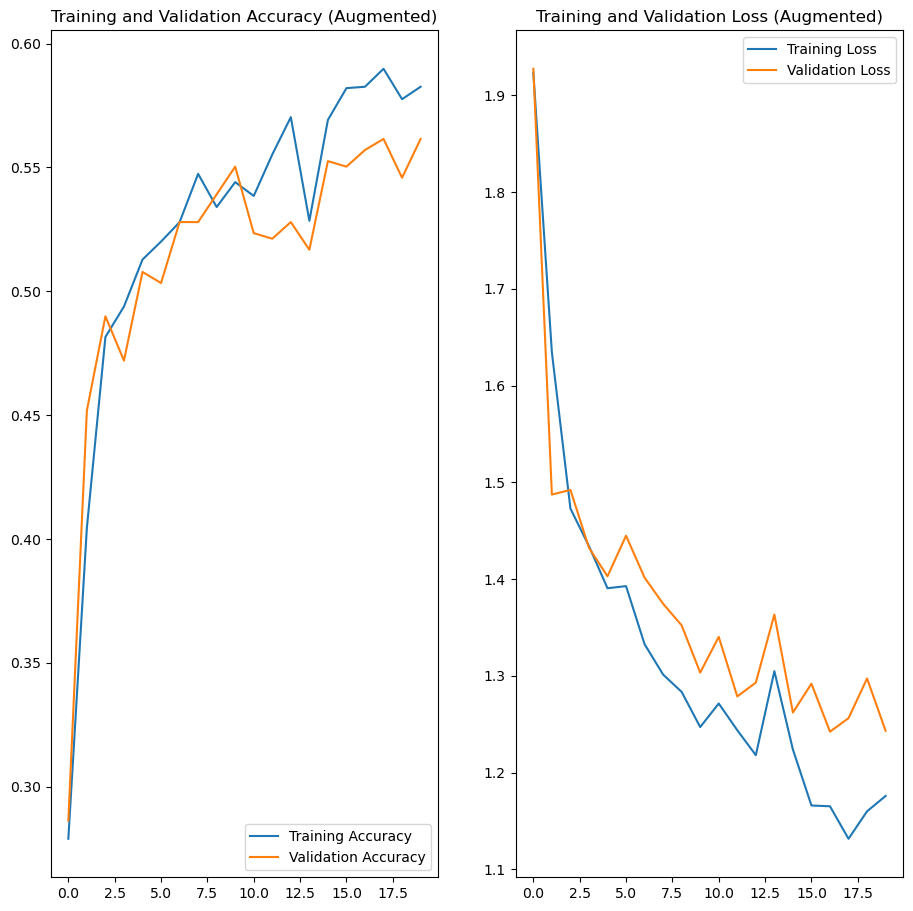

In [21]:
acc_aug = history_aug.history['accuracy']
val_acc_aug = history_aug.history['val_accuracy']
loss_aug = history_aug.history['loss']
val_loss_aug = history_aug.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(11, 11))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc_aug, label='Training Accuracy')
plt.plot(epochs_range, val_acc_aug, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy (Augmented)')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss_aug, label='Training Loss')
plt.plot(epochs_range, val_loss_aug, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss (Augmented)')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

In [22]:
# Conclusion:The model shows some signs of underfitting because:
# Training accuracy is not very high, indicating the model has not learned the training data very well.
# Validation accuracy is low and not significantly higher than training accuracy.
# Both validation accuracy and validation loss show fluctuations, indicating instability in performance on unseen data.

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [23]:
## Your code goes here.

import numpy as np

class_counts = np.array([len(os.listdir(os.path.join(data_dir_train, class_name))) for class_name in class_names])
print(f"Class counts: {dict(zip(class_names, class_counts))}")

# Least and most frequent classes
least_class = class_names[np.argmin(class_counts)]
most_class = class_names[np.argmax(class_counts)]

print(f"Least frequent class: {least_class}")
print(f"Most frequent class: {most_class}")

Class counts: {'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357, 'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
Least frequent class: seborrheic keratosis
Most frequent class: pigmented benign keratosis


#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [24]:
# Class counts: {'actinic keratosis': 114, 'basal cell carcinoma': 376, 'dermatofibroma': 95, 'melanoma': 438, 'nevus': 357,
#'pigmented benign keratosis': 462, 'seborrheic keratosis': 77, 'squamous cell carcinoma': 181, 'vascular lesion': 139}
# Least frequent class: seborrheic keratosis
# Most frequent class: pigmented benign keratosis


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [25]:
from pathlib import Path
path_to_training_dataset=Path("D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset / i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x156590B2B90>: 100%|██████████| 500/500 [00:03<00:00, 135.79 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x156592B7310>: 100%|██████████| 500/500 [00:03<00:00, 134.93 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x156592A0850>: 100%|██████████| 500/500 [00:03<00:00, 130.96 Samples/s]


Initialised with 438 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1565A7BDA50>: 100%|██████████| 500/500 [00:17<00:00, 28.86 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\nevus\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=824x719 at 0x15659A0A7D0>: 100%|██████████| 500/500 [00:18<00:00, 26.73 Samples/s]  


Initialised with 462 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x156590C4E10>: 100%|██████████| 500/500 [00:03<00:00, 128.53 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1565927BA50>: 100%|██████████| 500/500 [00:08<00:00, 58.37 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x156580841D0>: 100%|██████████| 500/500 [00:03<00:00, 125.94 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train\vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x156591CFC50>: 100%|██████████| 500/500 [00:03<00:00, 130.89 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [26]:
data_dir_train_aug=pathlib.Path("D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
image_count_train = len(list(data_dir_train_aug.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [27]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [28]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(lesion_list)

2239

In [29]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [30]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])

In [31]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(path_list_new)

4500

In [32]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
len(lesion_list_new)

4500

In [33]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [34]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

C:\Users\Saurabh Sabharwal\AppData\Local\Temp\ipykernel_18724\390629722.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [35]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [36]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [39]:
data_dir_train = pathlib.Path("D:\PG Diploma in AI & ML\Course-8_Deep-Learning\CNN_Assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size = (img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [41]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [42]:
## your code goes here
from tensorflow.keras import layers,models
input_shape = (img_height, img_width, 3)
model = models.Sequential([
    layers.Input(shape=input_shape),
    layers.Rescaling(1./255),  # Normalize pixel values
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(9, activation='softmax')  # 9 classes
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [43]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [44]:
epochs = 30
## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 84s 489ms/step - accuracy: 0.2359 - loss: 2.0499 - val_accuracy: 0.4625 - val_loss: 1.4178
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 80s 470ms/step - accuracy: 0.4689 - loss: 1.4339 - val_accuracy: 0.4944 - val_loss: 1.3676
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 94s 559ms/step - accuracy: 0.5583 - loss: 1.1946 - val_accuracy: 0.5887 - val_loss: 1.1615
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 523ms/step - accuracy: 0.6291 - loss: 1.0185 - val_accuracy: 0.6273 - val_loss: 1.0735
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 88s 522ms/step - accuracy: 0.7221 - loss: 0.7610 - val_accuracy: 0.6830 - val_loss: 0.9205
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 87s 515ms/step - accuracy: 0.7676 - loss: 0.6468 - val_accuracy: 0.7112 - val_loss: 0.8698
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 86s 511ms/step - accuracy: 0.8160 - loss: 0.5122 - val_accuracy: 0.7595 - val_loss: 0.8023
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 82s 486ms/step - accuracy: 0.8492 - loss: 0

#### **Todo:**  Visualize the model results

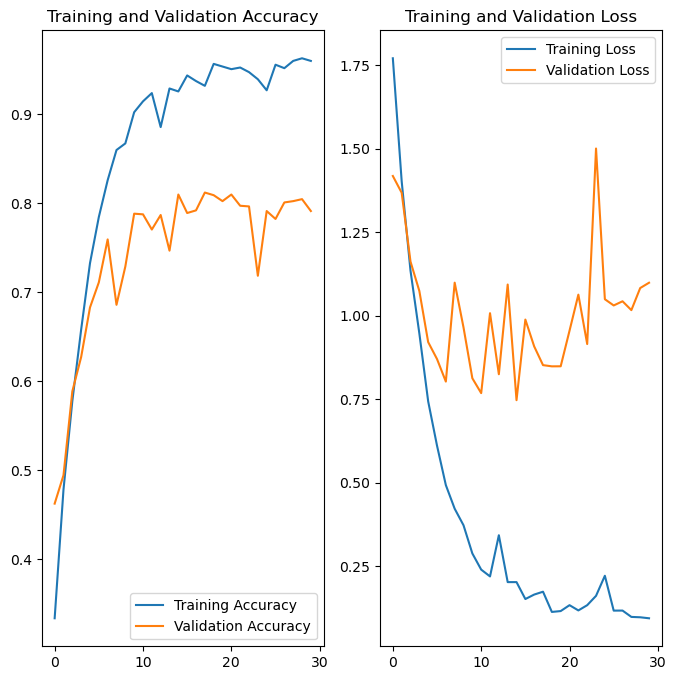

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



In [1]:
# The training accuracy is very high (over 95%) while the validation accuracy is around 79%-81%, suggesting that the model
# might be overfitting the training data.
# The validation loss did not consistently decrease, and in some epochs, it increased, further indicating overfitting.